In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
print(os.listdir("../input"))

warnings.filterwarnings('ignore') 

# Any results you write to the current directory are saved as output.

['Churn_Modelling.csv']


In [2]:
#Importing the data
data = pd.read_csv('../input/Churn_Modelling.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#Removing the unnecessary columns
data = data.drop(labels = ['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [5]:
#Checking for NULL values in the dataset
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Thats great, we have no NULL values!

In [6]:
#Doing some Exploratory Data Analysis on our new Data
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


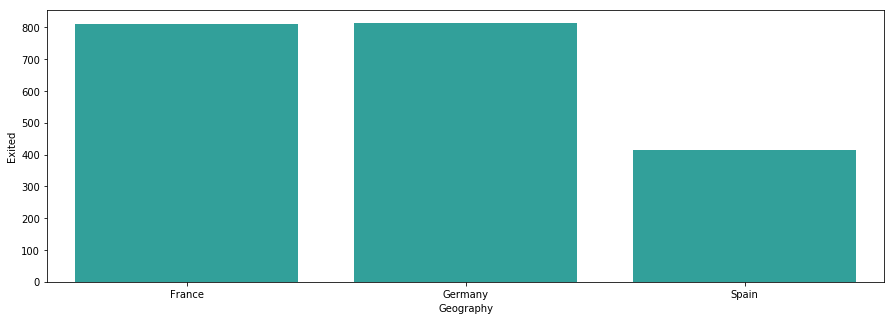

In [7]:
#Checking for demographic exits
geoExit = data[['Geography', 'Exited']].groupby(['Geography'], as_index = False).sum()
plt.figure(figsize = (15,5))
ax = sns.barplot(x = 'Geography', y = 'Exited', data = geoExit, color = 'LightSeaGreen')
plt.show()

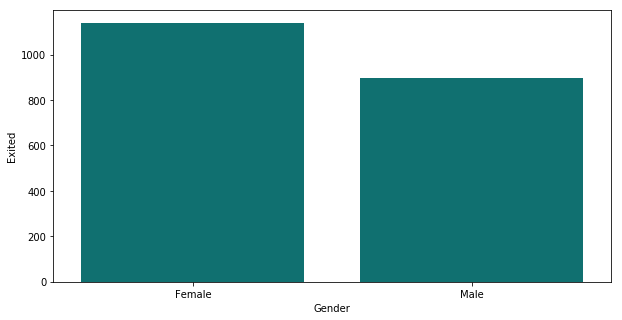

In [8]:
#Checking for Gender wise exits
genderExit = data[['Gender', 'Exited']].groupby(['Gender'], as_index = False).sum()
plt.figure(figsize = (10,5))
ax = sns.barplot(x = 'Gender', y = 'Exited', data = genderExit, color = 'teal')
plt.show()

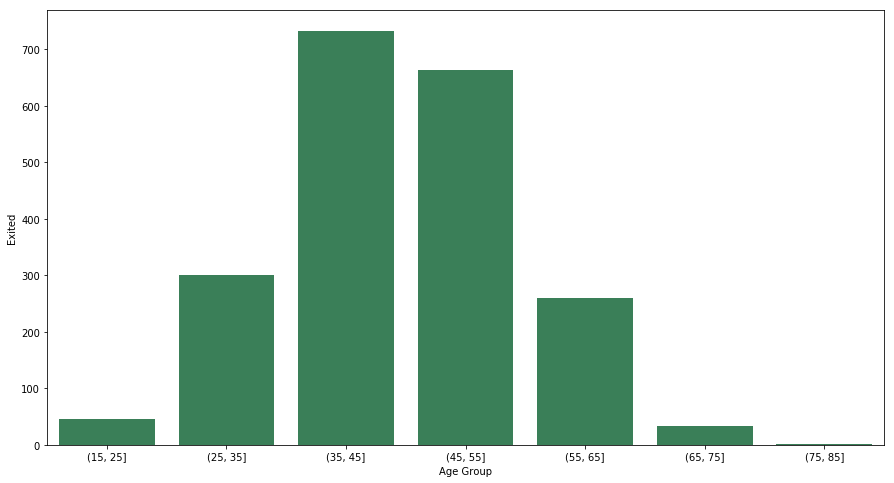

In [9]:
#Checking for Age wise exits
#We will create a new column, AgeGroup and seggregate the ages into different buckets
data['Age Group'] = pd.cut(data['Age'], np.arange(15, 90, 10))
ageExit = data[['Age Group', 'Exited']].groupby(['Age Group'], as_index = False).sum()
plt.figure(figsize = (15,8))
sns.barplot(x = 'Age Group', y = 'Exited', data = ageExit, color = 'seagreen')
plt.show()

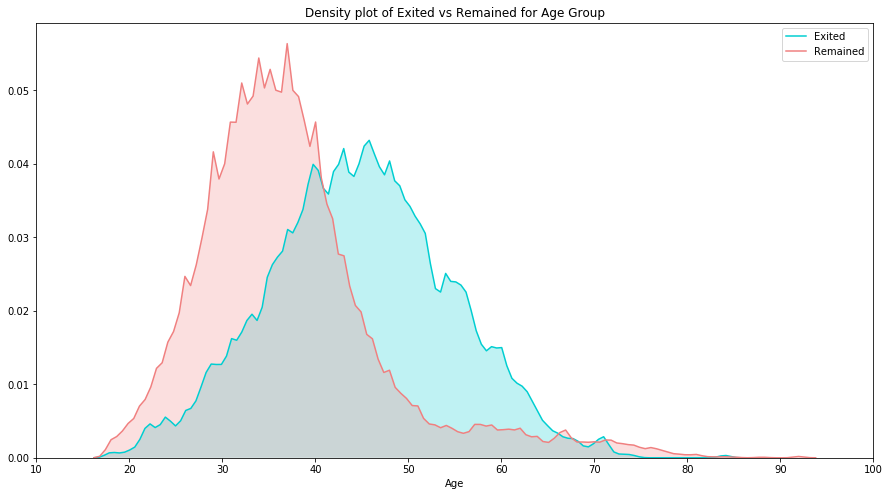

In [10]:
#Checking density plots for the Age wise exits
plt.figure(figsize=(15,8))
ax = sns.kdeplot(data['Age'][data.Exited == 1], color = 'darkturquoise', shade = True, bw = 0.6)
sns.kdeplot(data['Age'][data.Exited == 0], color = 'lightcoral', shade = True, bw = 0.6)
plt.legend(['Exited', 'Remained'])
plt.title('Density plot of Exited vs Remained for Age Group')
ax.set(xlabel =  'Age')
plt.xlim(10, 100)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f20fbb2c630>,
      dtype=object)

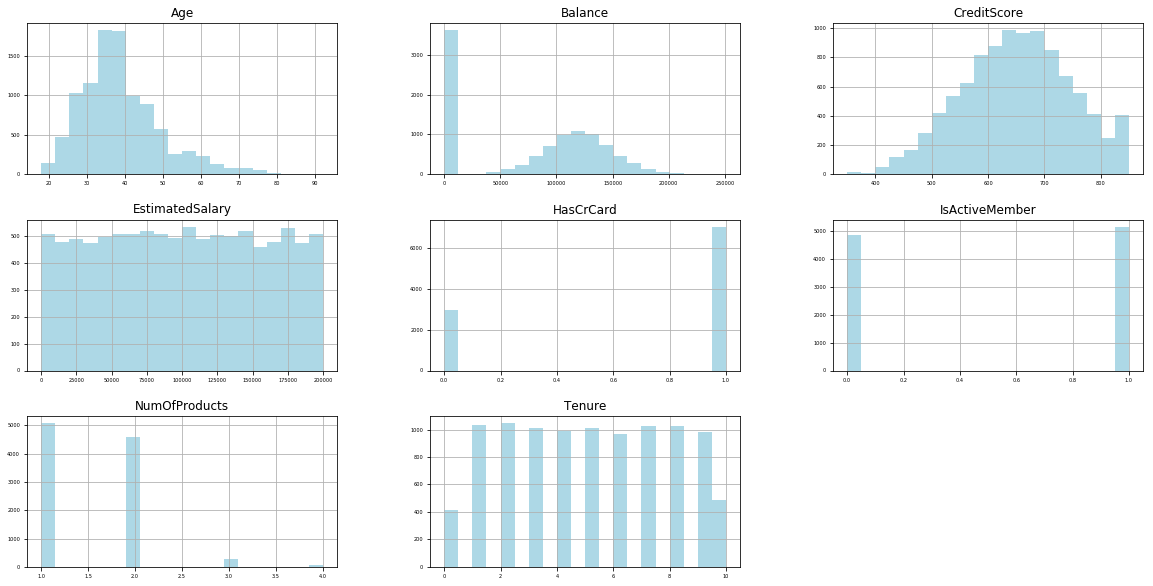

In [11]:
#Checking the distribution of the feautres
dist = data.drop('Exited', axis = 1)
dist.hist(figsize = (20,10), bins = 20, xlabelsize = 5, ylabelsize = 5, color = 'lightblue')

In [12]:
#Encoding the categorical variables
data = pd.get_dummies(data, columns = ['Geography', 'Gender'])

In [13]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age Group,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,"(35, 45]",1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,"(35, 45]",0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,"(35, 45]",1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,"(35, 45]",1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,"(35, 45]",0,0,1,1,0


In [14]:
#Dropping one of the columns created during encoding of categorical variables
data = data.drop(labels = ['Geography_Spain', 'Gender_Male'], axis = 1)

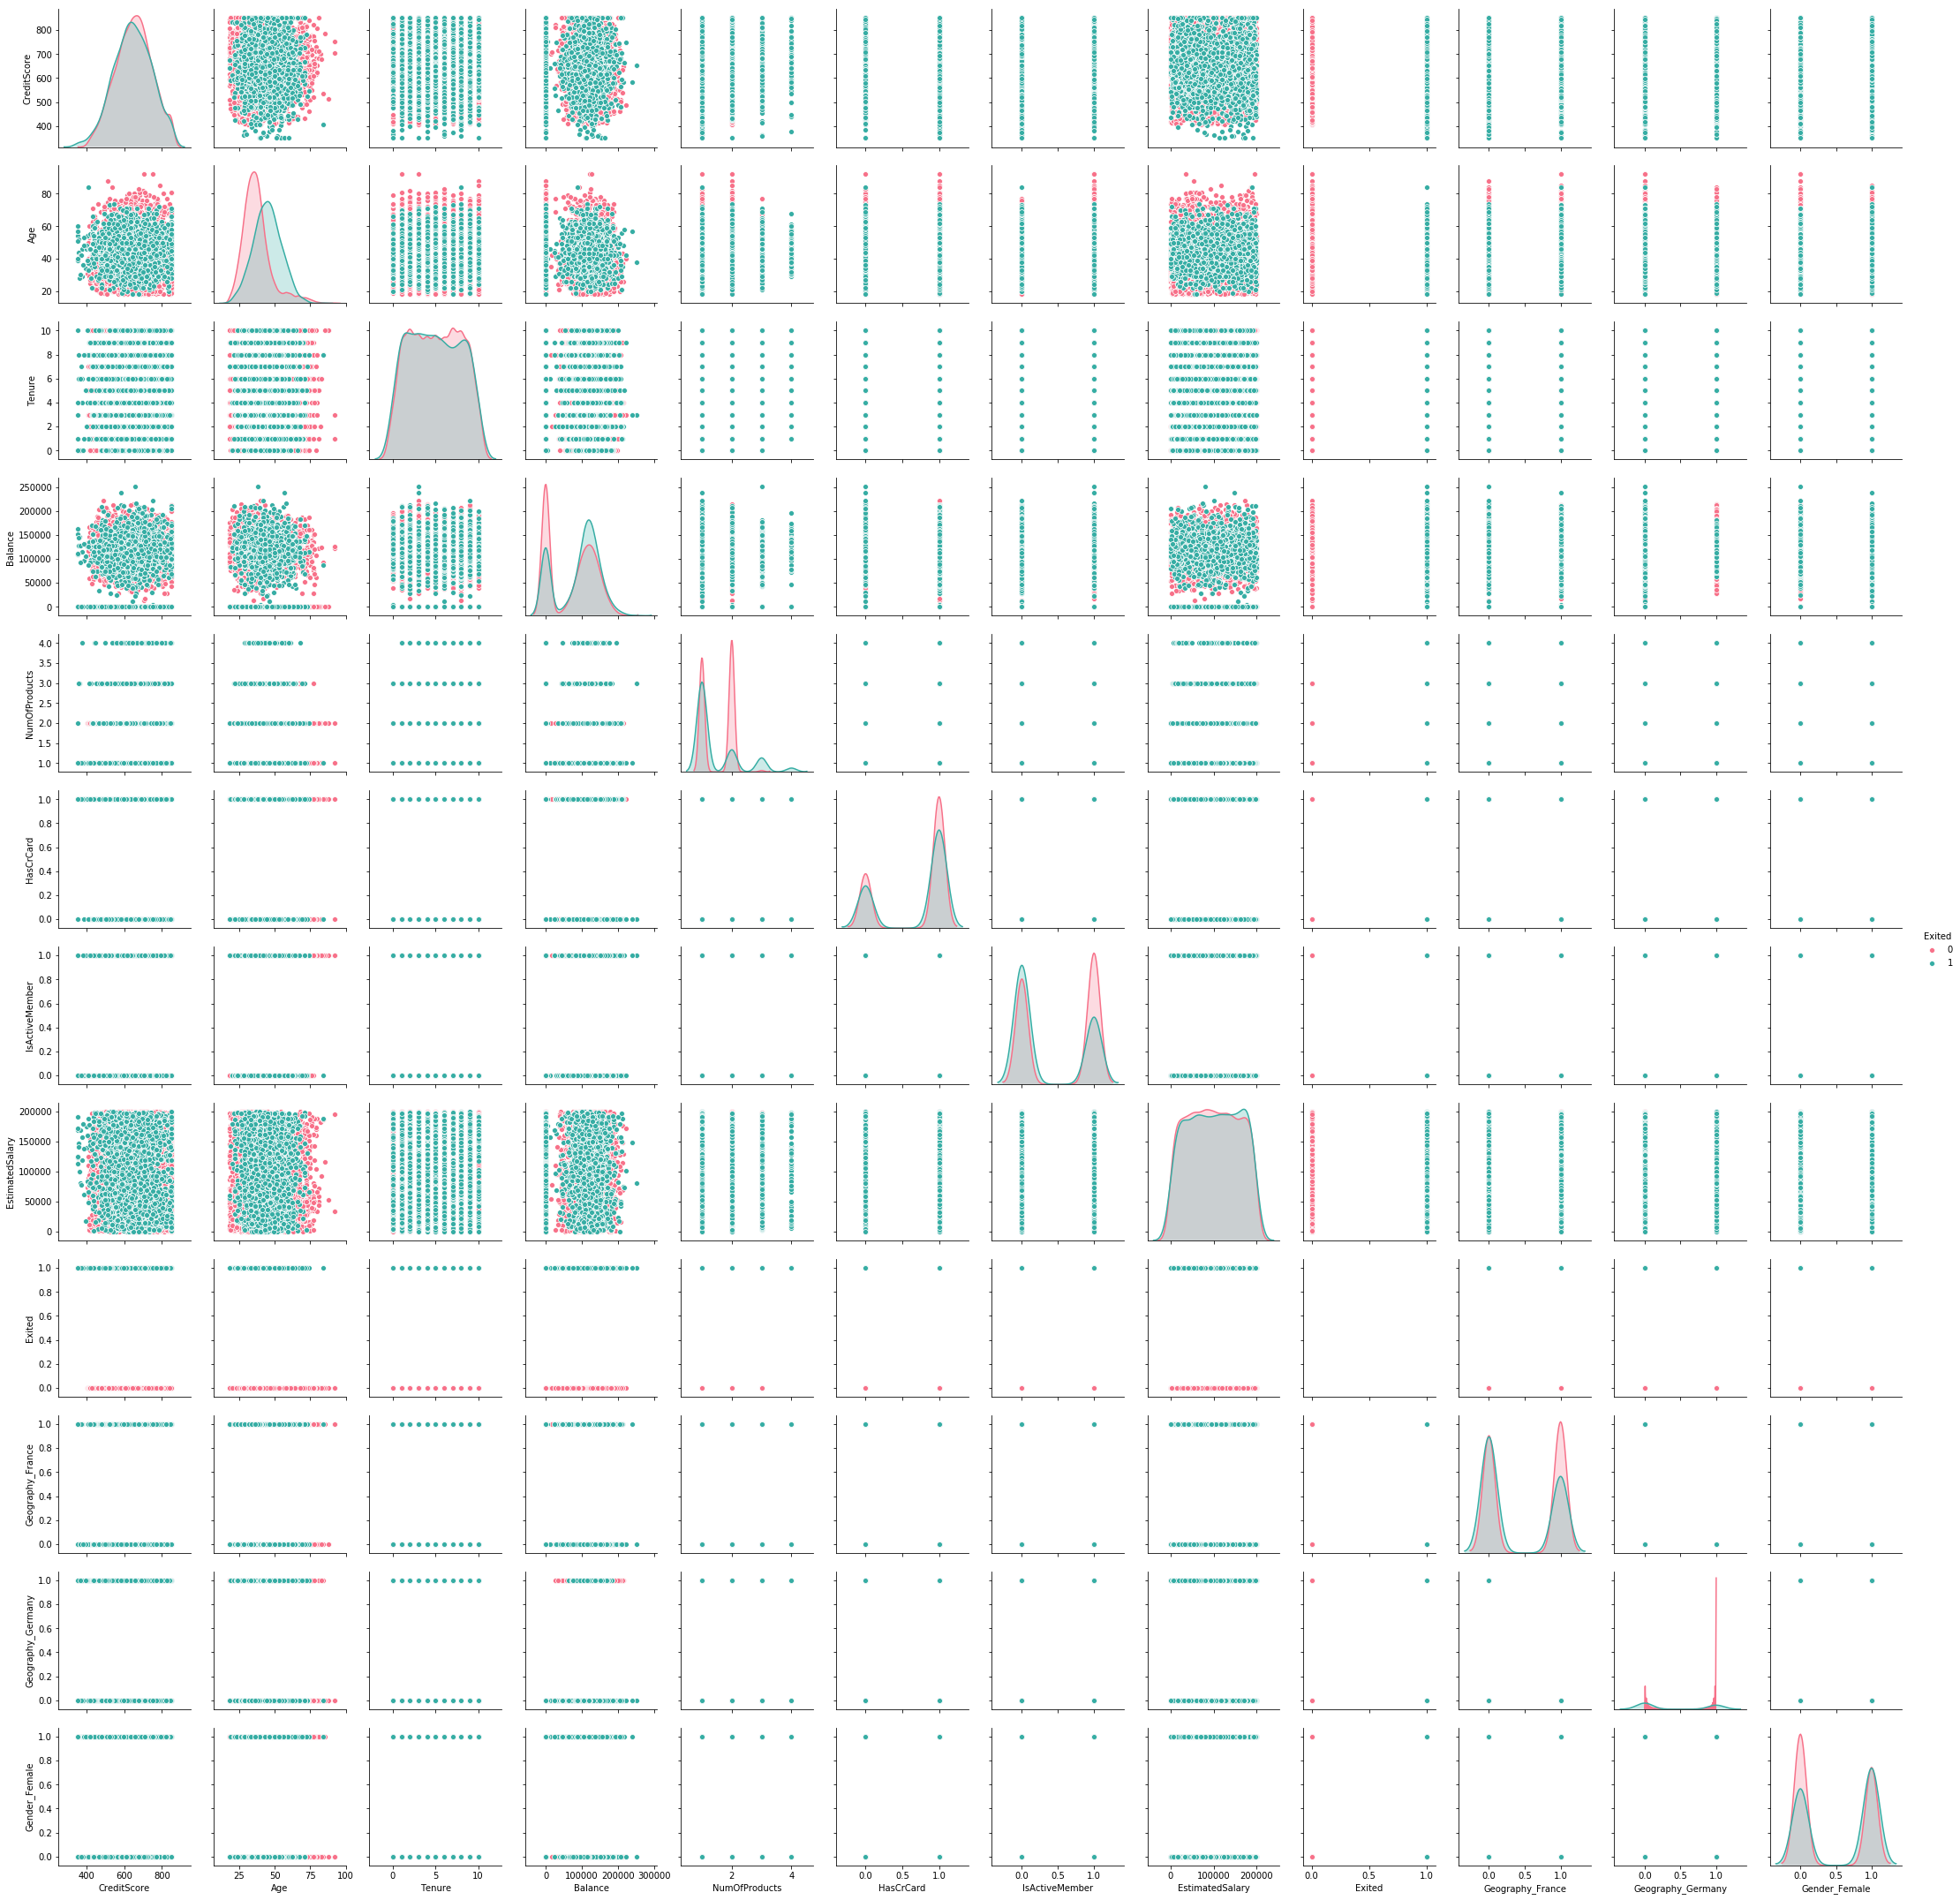

In [15]:
sns.pairplot(data, hue = 'Exited', palette = 'husl')

In [16]:
#Checking for Collinearity between the dependent variables
corr = data.drop('Exited', axis = 1).corr()

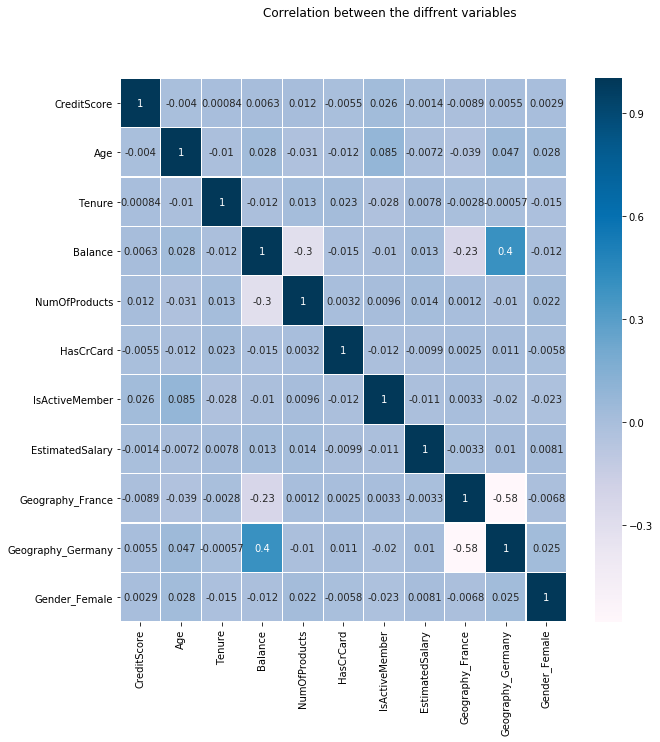

In [17]:
plt.figure(figsize = (10,10))
plt.suptitle('Correlation between the diffrent variables')
sns.heatmap(corr, cmap = 'PuBu', annot = True, linewidths = 0.1)

In [18]:
#Splitting the dataset
X = data.drop(labels = ['Exited','Age Group'], axis = 1)
Y = data['Exited']

In [19]:
#Checking how the independent variables look like
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Gender_Female
0,619,42,2,0.00,1,1,1,101348.88,1,0,1
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,1
3,699,39,1,0.00,2,0,0,93826.63,1,0,1
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1


In [20]:
#Converting the dataframe and dataseries into an np.array
X = X.values
Y = Y.values
print(type(X), type(Y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [21]:
#Standardizing the data, but before that, we must split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, random_state = 6)

In [22]:
#Now the standardization - since ew have variables ranging in different large values, this is required.
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
#Building the ANN.
#Importing Keras library packages
import keras
from keras.models import Sequential #To initialize the ANN
from keras.layers import Dense #To define the no of layers in the ANN

Using TensorFlow backend.


In [24]:
#Initialize the ANN
classifier = Sequential()

#Adding the input layer and specifying the first hidden layer
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 11))

#Adding the second hidden layer
classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))

#Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

#Compiling the ANN using Stochastic Gradient Descent optimizer, specifying Binary CE as my loss and using Accuracy as my measuring metric
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [25]:
#Training the model, I have specified the batch_size after which my weights are adjusted, and the total no. of epochs
classifier.fit(X_train, Y_train, batch_size = 25, nb_epoch = 200)

Epoch 1/200
8000/8000 [==============================] - 1s 104us/step - loss: 0.5537 - acc: 0.7959
Epoch 2/200
8000/8000 [==============================] - 0s 40us/step - loss: 0.4221 - acc: 0.8127
Epoch 3/200
8000/8000 [==============================] - 0s 41us/step - loss: 0.4081 - acc: 0.8234
Epoch 4/200
8000/8000 [==============================] - 0s 41us/step - loss: 0.4005 - acc: 0.8266
Epoch 5/200
8000/8000 [==============================] - 0s 41us/step - loss: 0.3935 - acc: 0.8294
Epoch 6/200
8000/8000 [==============================] - 0s 41us/step - loss: 0.3883 - acc: 0.8296
Epoch 7/200
8000/8000 [==============================] - 0s 42us/step - loss: 0.3835 - acc: 0.8317
Epoch 8/200
8000/8000 [==============================] - 0s 41us/step - loss: 0.3794 - acc: 0.8330
Epoch 9/200
8000/8000 [==============================] - 0s 42us/step - loss: 0.3752 - acc: 0.8344
Epoch 10/200
8000/8000 [==============================] - 0s 41us/step - loss: 0.3724 - acc: 0.8425
Epoch 11

In [26]:
#Predictions on the Test Set
Y_pred = classifier.predict(X_test)

In [27]:
#Converting the probabilities predicted above into TRUE or FALSE in order to get binary output
Y_pred = (Y_pred > 0.5)

In [28]:
#Checking for accuracy using Confusion_Matrix
cm = confusion_matrix(Y_test, Y_pred)

#My Confusion_Matrix accuracy
print(cm.trace()/ cm.sum())

0.8585
